## 2D hydrodynamics with LAX methods

@author Sayantan 

Date:  3 April 2023

update: 13 June 2023

### 1.1 Equations

The hydrostatic system with self-gravity-- 

For an isothermal gas, the dynamics is governed by continuity eqution and momentum equation. They are given as follows,

The mass-continuity equation
$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \nabla.(\rho \vec v) =0
\end{equation}\tag{1}
$$
The momentum equation 
$$
\begin{eqnarray}
\rho \frac{d \vec v}{ d t} = - \nabla P + \rho \vec g \\
\rho \left[\frac{\partial v}{\partial t}+ (\vec v . \nabla)\vec v \right] = - \nabla P + \rho \vec g
\end{eqnarray}\tag{3}
$$
The self-gravity is 
$$
\begin{equation}
\nabla. \vec g = -4\pi G\rho
\end{equation}\tag{3}
$$

where
$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation}\tag{4}
$$
is Poisson's equation and  

$$
\begin{equation}
\nabla \phi =  - \vec g 
\end{equation}\tag{5}
$$

<!-- For simplicity, we consider only 1-D. Later in the paper, we will implement 2D using PINNS.
$$
\begin{eqnarray}
    \frac{\partial \rho_1}{\partial t} + \rho_0 \frac{\partial v_1} {\partial x}  = 0 \\
    \rho_0 \frac{\partial v_1}{\partial t} = - c_s^{2} \frac{\partial \rho_1}{\partial x}  + \rho g_{1} \\
    % P_{1} = \gamma \frac{P_{0}}{\rho_0} \rho_1\\
    \frac{\partial g_1}{\partial x} = - 4 \pi G \rho_1
\end{eqnarray}\tag{6}
$$

#### The initial conditions is derivered using linear analysis (refer to the paper)

$$
\begin{eqnarray}
\rho(x,t=0) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{7}
$$

When self-gravity is active and $\lambda> \lambda_{J}$ 

$$
\begin{eqnarray}
v_{x}(x,t=0) &=& -v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{8}
$$

where $v_1 = \frac{\alpha}{k} \frac{\rho_1}{\rho}$ and 
$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}\tag{9}
$$
however for $\lambda < \lambda_{J}$  and for non self-gravitating system 

$$
\begin{eqnarray}
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{10}
$$

#### Considering Periodic Boundary Conditions


$$
\begin{eqnarray}
\rho(x=0,t) &=& \rho (x=xmax,t)\\
v_{x}(x=t,t) &=& v_{x}(x
\end{eqnarray}\tag{11}
$$

<!-- $$
\begin{eqnarray}
=xmax,t)
\end{eqnarray}\tag{12}
$$ -->

 -->


### 1.3 LAX Method

Here the Lax method is used to integrate the flux conservative form of the continuity and momentum equations. For an equation of the form 

$$
\begin{equation}
\frac{\partial f}{\partial t} = -\frac{\partial }{\partial x}\left(fv_x\right) - \frac{\partial }{\partial y}\left(fv_y\right)
\end{equation}\tag{6}
$$

the Lax method is the finite-difference approximation in 2D,

$$
\begin{equation}
\frac{f^{n+1}_{i,j}-\left( f^{n}_{i+1,j} + f^{n}_{i-1,j}+f^{n}_{i,j+1} + f^{n}_{i,j-1}\right)/4}{\Delta t}=-\frac{f^{n}_{i+1,j}v^{n}_{x,i+1,j}-f^{n}_{i-1,j}v^{n}_{x,i-1,j}}{2\Delta x} - -\frac{f^{n}_{i,j+1}v^{n}_{y,i,j+1}-f^{n}_{i,j-1}v^{n}_{y,i,j-1}}{2\Delta y}
\end{equation}\tag{7}
$$
Forward Time Centered Space (FTCS) method is unconditionally unstable . But the Lax method is conditionally stable if,

$$
\begin{equation}
\nu \equiv \frac{c\Delta t}{\Delta x} \leq 1
\end{equation}\tag{8}
$$

Where $\nu$ is known as Courant number. Physically it means that the signal cannot travel more than $\Delta x$ in $\Delta t$ time.

The continuity equation in 2D

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right) - \frac{\partial}{\partial y}\left(\rho v_{y}\right)\\
\end{eqnarray}\tag{9}
$$

The momemtum equation accumulating the components along x-axis (i vector)

$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t}+\rho v_{x}\frac{\partial v_{x}}{\partial x} + \rho v_{y}\frac{\partial v_{x}}{\partial y}&=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} +\frac{\partial\rho v_{x} v_{x}}{\partial x} - v_{x}\frac{\partial\rho v_{x}}{\partial x} +\frac{\partial\rho v_{y} v_{x}}{\partial y} - v_{x}\frac{\partial\rho v_{y}}{\partial y}&=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} - v_{x}\frac{\partial \rho v_{x}}{\partial x} - v_{x}\frac{\partial\rho v_{y}}{\partial y} &=&-\frac{\partial \rho v_{x} v_{x}}{\partial x}- \frac{\partial\rho v_{y} v_{x}}{\partial y}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x}
\end{eqnarray}\tag{10}
$$

Now substituting equation (9) to the seconds term in the last eqn of EQ (10) we get,
$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t} +v_{x}\frac{\partial \rho}{\partial t} &=& -\frac{\partial\rho v_{x} v_{x}}{\partial x}- \frac{\partial\rho v_{y} v_{x}}{\partial y} -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x}\nonumber\\
\Rightarrow \frac{\partial\rho v_{x}}{\partial t} &=&-\frac{\partial\rho v_{x} v_{x}}{\partial x}- \frac{\partial\rho v_{y} v_{x}}{\partial y}-c^{2}_{s}\frac{\partial\rho}{\partial x}+ \rho g_{x}\nonumber
\end{eqnarray}\tag{11}
$$

#### Hence the flux conservative form of momentum equation and the continuity equation in 2D ,

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right) - \frac{\partial}{\partial y}\left(\rho v_{y}\right)
\end{eqnarray}\tag{12a}
$$
$$
\begin{eqnarray}
\frac{\partial\left(\rho v_{x}\right)}{\partial t} &=&-\frac{\partial}{\partial x}\left(\rho v_{x} v_{x}\right)-\frac{\partial\rho v_{y} v_{x}}{\partial y}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x}
\end{eqnarray}\tag{12b}
$$

#### Similarly the momentum equation in the y direction 
$$
\begin{eqnarray}
\frac{\partial\left(\rho v_{y}\right)}{\partial t} &=&-\frac{\partial}{\partial y}\left(\rho v_{y} v_{y}\right)-\frac{\partial\rho v_{y} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial y} + \rho g_{y}
\end{eqnarray}\tag{12c}
$$

Gas boundary and initial condition.


$$
\begin{eqnarray}
\rho(x) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)\\
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right) or \\
\end{eqnarray}\tag{13}
$$

If $\omega^2 < 0$, the system in unstable such that $4 \pi G \rho_0 > c_s^2 k^2$. The $\omega = \pm i \alpha$ where 

$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}
$$

Then the initial velocity perturbation is
$$
\begin{eqnarray}
v_{x}(x) &=& - v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray} \tag{14}
$$

where
$$
\begin{eqnarray}
     i \omega \rho_1 - i  k \rho_0 v_1 =& 0  \\ \nonumber
     v_1 =& \frac{\omega}{k}\frac{\rho_1}{\rho_0} 
\end{eqnarray} \tag{15}
$$

In this section we use the Lax method to solve equations (12a) (12b) and (12c) are solved. Equation (6) is subsituted in  (12a) (12b) and (12c) to get the following solution for $\rho$,  $v_{x}$ and $v_{y}$.

$$
\begin{eqnarray}
\rho^{n+1}_{i,j}= \frac{1}{4}\left(\rho^{n}_{i+1,j} +\rho^{n}_{i-1,j} + \rho^{n}_{i,j+1} +\rho^{n}_{i,j-1}\right)-\frac{\Delta t}{2\Delta x}\left(\rho^{n}_{i+1,j} v^{n}_{x,i+1,j}-\rho^{n}_{i-1,j} v^{n}_{x,i-1,j}\right)- \frac{\Delta t}{2\Delta y}\left(\rho^{n}_{i,j+1} v^{n}_{y,i,j+1}-\rho^{n}_{i,j+1} v^{n}_{y,i,j-1}\right)\\
U^{n+1}_{j} = \frac{1}{4}\left(U^{n}_{i+1,j} +U^{n}_{i-1,j} + U^{n}_{i,j+1} +U^{n}_{i,j-1}\right)-\frac{\Delta t}{2\Delta x}\left(U^{n}_{i+1,j} v^{n}_{x,i+1,j}-U^{n}_{i-1,j} v^{n}_{x,i-1,j}\right)- \frac{\Delta t}{2\Delta y}\left(U^{n}_{i,j+1} v^{n}_{y,i,j+1}-U^{n}_{i,j-1} v^{n}_{y,i,j-1}\right)-\frac{c^{2}_{s}\Delta t}{2\Delta x}\left(\rho^{n}_{i+1,j}-\rho^{n}_{i-1,j}\right) -\frac{\Delta t \rho^n_{i,j}}{2\Delta x}\left(\phi^{n}_{i+1,j}-\phi^{n}_{i-1,j}\right)
\end{eqnarray} \tag{16}
$$

$$
\begin{equation}
W^{n+1}_{j} = \frac{1}{4}\left(W^{n}_{i+1,j} +W^{n}_{i-1,j} + W^{n}_{i,j+1} +W^{n}_{i,j-1}\right)-\frac{\Delta t}{2\Delta x}\left(W^{n}_{i+1,j} v^{n}_{x,i+1,j}-W^{n}_{i-1,j} v^{n}_{x,i-1,j}\right)- \frac{\Delta t}{2\Delta y}\left(W^{n}_{i,j+1} v^{n}_{y,i,j+1}-W^{n}_{i,j-1} v^{n}_{y,i,j-1}\right)-\frac{c^{2}_{s}\Delta t}{2\Delta y}\left(\rho^{n}_{i,j+1}-\rho^{n}_{i,j-1}\right) -\frac{\Delta t \rho^n_{i,j}}{2\Delta y}\left(\phi^{n}_{i,j+1}-\phi^{n}_{i,j-1}\right)
\end{equation} \tag{17}
$$


$$
\begin{equation}
U^{n}_{j} = v^{n}_{x,j} \rho^{n}_{j}
\end{equation} \tag{18}
$$

$$
\begin{equation}
W^{n}_{j} = v^{n}_{y,j} \rho^{n}_{j}
\end{equation}\tag{19}
$$ 


In [1]:
import numpy as np
import os

# Import TensorFlow and NumPy
# import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import scipy


## For the FFT solver

from numpy.fft import fft, ifft,fft2, ifft2
from scipy import signal

np.random.seed(1234)
tf.random.set_seed(1234)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


2023-06-13 17:22:43.639120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 17:22:46.949831: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-13 17:23:01.933591: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-13 17:23:01.935138: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
def fft_solver(rho,Lx,nx,Ly,ny,dim = None):
    
    '''
    A FFT solver that uses discrete Fast Fourier Transform to
    solve the Poisson Equation:
    We apply the correction due to the finite difference grid of phi
    
    Input: 1. The source function density in this case
           2. # of grid point Nx and Ny for 2D
           3. Domain Size in each dimension
           4. Dim : will the updated later to work for any dimension
    
    Output: the potential phi and the field g (optional) not returned currently.
    
    '''

    if dim:
        dx, dy = Lx / nx, Ly / ny
    else:
        dx = Lx / nx,
    # Calculate the Fourier modes of the gas density
    rhohat = fft2(rho)

    # Calculate the wave numbers in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
    ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

    # Construct the Laplacian operator in Fourier space
    kx2, ky2 = np.meshgrid(kx**2, ky**2)
    laplace = -(kx2 + ky2)

    ## Correction for the dicrete FFT.  Need to check the calculations
#     laplace = 2*(np.cos(kx*dx)-1)/(dx**2) +  2*(np.cos(ky*dx)-1)/(dy**2)

    laplace[laplace == 0] = 1e-9

    # Solve for the electrostatic potential in Fourier space
    phihat = rhohat / laplace

    # Transform back to real space to obtain the solution
    phi = np.real(ifft2(phihat))
#     dphidx = np.gradient(phi, dx)
#     dphidy = np.gradient(phi, dy)
#     return phi,dphidx, dphidy 
    return phi

## Testing the FFT solver for a cosine wave denstity 

shape (128, 128)


Text(0.5, 0.92, 'Gravitational Potential')

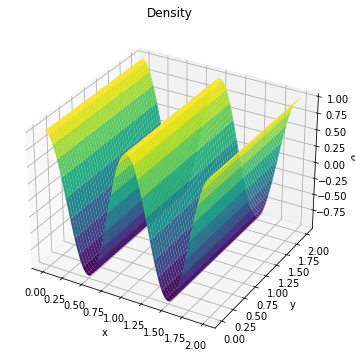

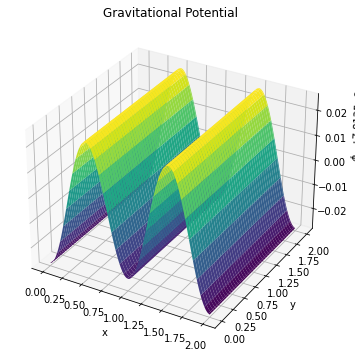

In [3]:
# Define the problem domain and grid spacing
Lx, Ly = 2.0, 2.0
Nx, Ny = 128, 128
n = 10
rho = np.zeros((n,Nx,Ny))
# Define the charge density rho(x,y)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
xx, yy  = np.meshgrid(x, y) 
 
rho[0,:,:] = np.cos(2 * np.pi * xx)
print("shape",rho[0,:,:].shape)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(xx,yy,rho[0,:,:], cmap='viridis')
ax.set_zlabel(r"$\rho$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Density")


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
phi =  fft_solver(rho[0,:,:],Lx,Nx,Ly,Ny,dim = 2)
surf = ax.plot_surface(xx,yy,phi, cmap='viridis')
ax.set_zlabel(r"$\phi$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Gravitational Potential")

In [25]:
def lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = None,comparison =None,animation=None):
    '''
    This function solves the hydrodynamic Eqns in 1D with/without self gravity using LAX methods 
    described above 
    
    
    Input:  Time till the system is integrated :time
            Number of Xgrid points : N
            Courant number : nu
            Wavelength : If lambda> lambdaJ (with gravity--> Instability) else waves propagation 
            Number of waves : The domain size changes with this maintain periodicity
            Density perturbation : rho1 (for linear or non-linear perturbation)
            Gravity:  If True it deploys the FFT routine to estimate the potential 
            isplot(optional): if True plots the output
            Comparison (optional) : If True then the plots are overplotted with LT solutions for comparison
            Animation (optional): Not used at the moment
    
    Output: Density, velocity + (phi and g if gravity is True)
            isplot: True then the plots are generated 
    
    '''
    
    
    # rho_max = []
    lam = lam          # one wavelength
    num_of_waves  = num_of_waves  
    Lx = lam * num_of_waves            # Maximum length (two wavelength)
    Ly = lam * num_of_waves 
    print("at time= ",time)
    ### Declaring the Constants

    c_s = 1.0            # % Sound Speed  
    rho_o = 1.0          # zeroth order density
    nu = nu              # courant number (\nu = 2 in 2d)
    rho_1 = rho_1        # for linear/nonlinear wave propagation
    const =  1           # The actual value is 4*pi
    G = 1.0              # Gravitational Constant

    ### Grid X-T 
    Nx = N                # The grid resolution values2d:N =(10,50,100,500)
    dx = float(Lx/Nx)      # length spacing          
    ### Grid X-T 
    Ny = Nx               # The grid resolution values2d:N =(10,50,100,500)
    dy = float(Ly/Ny)      # length spacing       
    dt = nu*dx/c_s       # time grid spacing
 

    ## For simplification
    mux = dt/(2*dx)      # is the coefficient in the central differencing Eqs above 
    muy = dt/(2*dy)      # is the coefficient in the central differencing Eqs above
    n = int(time/dt)     # grid points in time
    print("For dx = {} and dt = {} and time gridpoints n = {} ".format(dx,dt,n))
    
    ########### Initializing the ARRAY #######################
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    xx, yy  = np.meshgrid(x, y,indexing='ij') ## Mesh for the 2D domain
    rho0 = np.zeros((Nx,Ny))
    rho1 = np.zeros((Nx,Ny))
    vx0 =np.zeros((Nx,Ny)) 
    vx1 =np.zeros((Nx,Ny))
    vy0 =np.zeros((Nx,Ny))
    vy1 =np.zeros((Nx,Ny))
    
    Px0 =np.zeros((Nx,Ny)) # The flux term  U in the above equations
    Px1 =np.zeros((Nx,Ny))
    Py0 =np.zeros((Nx,Ny)) # The flux term  V in the above equations 
    Py1 =np.zeros((Nx,Ny))
    
    ## gravitational potential
    phi0 = np.zeros((Nx,Ny))
    phi1 = np.zeros((Nx,Ny))
    print("shape of Phi",phi1.shape)
        
   ## Calculating the jeans length is gravity is Turned on
    if gravity:
        jeans = np.sqrt(4*np.pi**2*c_s**2/(const*G*rho_o))
        print("Jean's Length",jeans)

    ######################## Initial Conditions ###########################
    
    rho0 = rho_o + rho_1* np.cos(2*np.pi*xx/lam) # defing the density at t = 0 EQ 11
    
    
    if gravity == False:
        print("Propagation of Sound wave") 
        v_1 = (c_s*rho_1)/rho_o # velocity perturbation
        vx0 = v_1 * np.cos(2*np.pi*xx/lam) # the velocity at t =0

        ## Linear Theory
        if comparison:
            rho_LT  = rho_o + rho_1*np.cos(2*np.pi * x/lam - 2*np.pi/lam *time)
            rho_LT_max = np.max(rho_o + rho_1*np.cos(2*np.pi * x/lam - 2*np.pi/lam *time))
            vx_LT = v_1* np.cos(2*np.pi * x/lam - 2*np.pi/lam *time) 
            vy_LT = np.zeros(Ny)
          
    
    else:    ######## When self-gravity is True and see EQN 12
        if lam >= jeans:  
            print("There is gravitational instabilty  lam = {} > l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(const*G*rho_o-c_s**2*(2*np.pi/lam)**2)
            v_1  = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) ## With gravity     
            vx0 = - v_1 * np.sin(2*np.pi*xx/lam) # the velocity at t =0
            # print("initial vy",vy[n-1,1,:])
            ##### Density values from Linear Theory at t 
            if comparison:
                rho_LT = rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam)
                rho_LT_max = np.max(rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam))
                vx_LT = -v_1*np.exp(alpha * time)*np.sin(2*np.pi*x/lam)
                vy_LT = np.zeros(Nx)
                
        else:
            print("There is no gravitational instabilty as lam = {} < l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(c_s**2*(2*np.pi/lam)**2 - const*G*rho_o)
            v_1 = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) # velocity perturbation
            vx0 = v_1 * np.cos(2*np.pi*xx/lam) # the velocity at t =0
            if comparison:
                rho_LT = rho_o + rho_1*np.cos(alpha * time - 2*np.pi*x/lam)
                rho_LT_max = np.max(rho_o + rho_1*np.cos(alpha * time - 2*np.pi*xx/lam))
                vx_LT = v_1*np.cos(alpha * time - 2*np.pi*x/lam)
                vy_LT = np.zeros((Nx))

        # Calculating the potential and the field using FFT    
#         phi[0,:,:],dphidx,dphidy = fft_solver(const*(rho[0,:,:]-rho_o),Lx,Nx,Ly,Ny,dim = 2)
        phi0 = fft_solver(const*(rho0-rho_o),Lx,Nx,Ly,Ny,dim = 2)
        print("shape of Phi",phi0.shape)
#         fft_solver(rho,Lx,nx,Ly,ny,dim = 2)

    

    ####### The Flux term #########
    Px0=rho0*vx0
    Py0=rho0*vy0
    
    #################################FINITE DIFFERENCE #######################
    for k in range(1,n): ## Looping over time

        rho1 =  (1/4)*(np.roll(rho0, -1, axis=0)+ np.roll(rho0, 1, axis=0)\
                        +np.roll(rho0, -1, axis=1)+ np.roll(rho0, 1, axis=1))\
        -(mux*(np.roll(rho0,-1,axis=0)*np.roll(vx0,-1,axis=0)-np.roll(rho0,1, axis=0)*np.roll(vx0,1,axis=0)))\
        -(muy*(np.roll(rho0,-1,axis=1)*np.roll(vy0,-1,axis=1)-np.roll(rho0,1, axis=1)*np.roll(vy0,1,axis=1)))

        if gravity == False: ## Hydro sound wave when gravity is absent  
            
            Px1 = 0.25*(np.roll(Px0,-1,axis=0)+ np.roll(Px0,1,axis=0) + np.roll(Px0,-1,axis=1)+ np.roll(Px0,1,axis=1))\
            -(mux*(np.roll(Px0,-1,axis=0)*np.roll(vx0,-1,axis=0)- np.roll(Px0,1,axis=0)*np.roll(vx0,1,axis=0)))\
            -(muy*(np.roll(Px0,-1,axis=1)*np.roll(vy0,-1,axis=1)- np.roll(Px0,1,axis=1)*np.roll(vy0,1,axis=1)))\
            -((c_s**2)*mux*(np.roll(rho0,-1,axis=0)- np.roll(rho0,1,axis=0)))

            Py1 = 0.25*(np.roll(Py0,-1,axis=0)+ np.roll(Py0,1,axis=0) + np.roll(Py0,-1,axis=1)+ np.roll(Py0,1,axis=1))\
            -(muy*(np.roll(Py0,-1,axis=1)*np.roll(vy0,-1,axis=1)- np.roll(Py0,1,axis=1)*np.roll(vy0,1,axis=1)))\
            -(mux*(np.roll(Py0,-1,axis=0)*np.roll(vx0,-1,axis=0)- np.roll(Py0,1,axis=0)*np.roll(vx0,1,axis=0)))\
            -((c_s**2)*muy*(np.roll(rho0,-1,axis=1)- np.roll(rho0,1,axis=1)))

             
        else: ## With self-gravity activated 
            Px1 = 0.25*(np.roll(Px0,-1,axis=0)+ np.roll(Px0,1,axis=0) + np.roll(Px0,-1,axis=1)+ np.roll(Px0,1,axis=1))\
            -(mux*(np.roll(Px0,-1,axis=0)*np.roll(vx0,-1,axis=0)- np.roll(Px0,1,axis=0)*np.roll(vx0,1,axis=0)))\
            -(muy*(np.roll(Px0,-1,axis=1)*np.roll(vy0,-1,axis=1)- np.roll(Px0,1,axis=1)*np.roll(vy0,1,axis=1)))\
            -((c_s**2)*mux*(np.roll(rho0,-1,axis=0)- np.roll(rho0,1,axis=0)))\
            -(mux*rho0*(np.roll(phi0,-1,axis=0)- np.roll(phi0,1,axis=0)))

            Py1 = 0.25*(np.roll(Py0,-1,axis=0)+ np.roll(Py0,1,axis=0) + np.roll(Py0,-1,axis=1)+ np.roll(Py0,1,axis=1))\
            -(muy*(np.roll(Py0,-1,axis=1)*np.roll(vy0,-1,axis=1)- np.roll(Py0,1,axis=1)*np.roll(vy0,1,axis=1)))\
            -(mux*(np.roll(Py0,-1,axis=0)*np.roll(vx0,-1,axis=0)- np.roll(Py0,1,axis=0)*np.roll(vx0,1,axis=0)))\
            -((c_s**2)*muy*(np.roll(rho0,-1,axis=1)- np.roll(rho0,1,axis=1)))\
            -(muy*rho0*(np.roll(phi0,-1,axis=1)- np.roll(phi0,1,axis=1)))

  
            phi1= fft_solver(const*(rho1-rho_o),Lx,Nx,Ly,Ny,dim = 2)

        vx1 = Px1/rho1 ## 2-D velocity vx 
        vy1 = Py1/rho1 ## 2-D velocity vy
               ## memory tranfer to overwrite "1" in the next time step
        rho0 = rho1
        vx0 = vx1
        vy0 = vy1
        
        Px0 = Px1
        Py0 = Py1
        
        phi0= phi1
        
        ## Updating dt based on the highest signal speed in the code
        dt1 = nu*dx/np.max([abs(vx1),abs(vy1)])
        dt2 = nu*dx/c_s
        
        
        dt = np.min([dt1,dt2])
        mux = dt/(2*dx)      # is the coefficient in the central differencing Eqs above 
        muy = dt/(2*dy)      # is the coefficient in the central differencing Eqs above
      
    
        n = int(time/dt)     # grid points in time updated dynamically
    rho_max = np.max(rho1)   ## Maximum density from the FD calculation 
    
    # print(ro1)
# #     ################################# PLOTTING #######################
 
    if isplot : 
        plt.figure(1,figsize=(6,4))
        plt.plot(x,rho0[:,1]-rho_o,linewidth=1,label="FD at t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        # plt.text(.6,.15,r"dt=%f"%(dt),fontsize=12)
        plt.title("At time {} and rho_1 = {}".format(time,rho_1))
        plt.ylabel(r"$\mathbf{\rho - \rho_{0}}$")
        plt.savefig(output_folder+'/LAX_density'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)
        if comparison : 
            plt.plot(x,rho_LT-rho_o,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
            plt.savefig(output_folder+'/LAX_density'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)

        plt.figure(2,figsize=(6,4))
        plt.plot(x,vx1[:,1],'--',markersize=2,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
        plt.ylabel("vx")
        plt.savefig(output_folder+'/LAX_velocity'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)
        if comparison : 
            plt.plot(x,vx_LT,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True) 
            plt.savefig(output_folder+'/LAX_velocity'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)
            
        plt.figure(3,figsize=(6,4))
        plt.plot(y,vy1[1,:],'--',markersize=2,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{y}$")
        plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
        plt.ylabel("vy")
        if comparison : 
            plt.plot(y,vy_LT,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)

        
            
        if gravity:
             #### Plotting the comparison of the \rho_max for FD and Linear Theory           
            plt.figure(5,figsize=(6,4))              
            plt.scatter(time,rho_max,label="FD")          
            plt.xlabel("t")
            plt.ylabel(r"$\log (\rho_{\rm max} - \rho_{0}) $")
            plt.yscale('log')
            plt.legend(numpoints=1,loc='upper left',fancybox=True,shadow=True)
            plt.savefig(output_folder+'/LAX-Comp'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)
            if comparison:
                plt.scatter(time,rho_LT_max,facecolors='none', edgecolors='r',label="LT")   
                plt.legend(numpoints=1,loc='upper left',fancybox=True,shadow=True)
                print(time, rho_LT_max)
                plt.savefig(output_folder+'/LAX-Comp'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)

#         if dim_plot == True: ## PLotting in 3D
        
#             fig = plt.figure(6)
#             ax = fig.add_subplot(111, projection='3d')
#             sc = ax.scatter(xx, yy, zz, c=rho0)
#             plt.colorbar(sc)
#             plt.savefig(output_folder+'/3D-denstiy'+str(lam)+'_'+str(num_of_waves)+'_'+str(t)+'.png', dpi=300)
#             plt.show()



# # #     else:
# # #         if gravity:
# # #             return x,rho,v,phi,dphidx,n,rho_LT,rho_LT_max,rho_max,v_LT
# # #         else:
# # #             return x,rho,v,rho_LT,rho_LT_max,rho_max,v_LT
#     ## Clearing the memory
    del rho0,phi0,vx0,vy0, Px0,Py0

Creation of the directory 2D_fig_7.0_1.0_2_0.03 failed/ not needed as it already exit
at time=  1.0
For dx = 0.07 and dt = 0.035 and time gridpoints n = 28 
shape of Phi (200, 200)
Propagation of Sound wave
Total time = 1.537086009979248 sec for N= 200


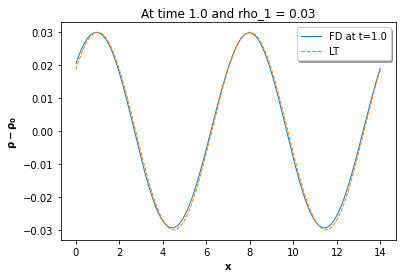

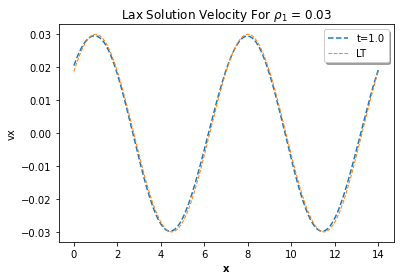

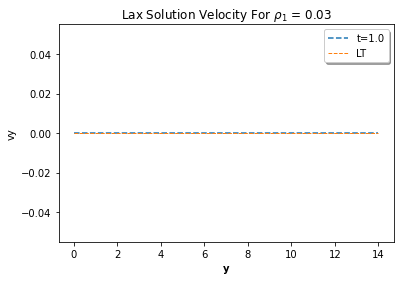

In [28]:

lam = 7.0           # one wavelength
num_of_waves = 2    # the number of waves
rho_1 = 0.03;       # perturbation strength
nu = 0.5
N = 200

t = 1.0

import time

## Folder to save the plots
output_folder = "2D_fig_" + str(lam) + '_' + str(t) + '_' + str(num_of_waves) +  '_' + str(rho_1)
try:
    os.makedirs(output_folder)
except OSError:
    print ("Creation of the directory %s failed/ not needed as it already exit" % output_folder)
else:
    print ("Successfully created the directory %s" % output_folder)


start = time.time()


## Wihout Gravity
lax_solution(t,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = True,comparison = True,animation=None)
## With Gravity
# lax_solution(t,N,nu,lam,num_of_waves,rho_1,gravity=True,isplot = True,comparison = True,animation=None)


# print("hello")
end = time.time()
print("Total time = {} sec for N= {}".format(end - start,N))


## To check the time evolution 

at time=  0.5
For dx = 0.07 and dt = 0.035 and time gridpoints n = 14 
shape of Phi (200, 200)
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
shape of Phi (200, 200)
0.5 1.0373975413608025
at time=  1.5
For dx = 0.07 and dt = 0.035 and time gridpoints n = 42 
shape of Phi (200, 200)
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
shape of Phi (200, 200)
1.5 1.058114786155258
at time=  2.5
For dx = 0.07 and dt = 0.035 and time gridpoints n = 71 
shape of Phi (200, 200)
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
shape of Phi (200, 200)
2.5 1.090308834404051


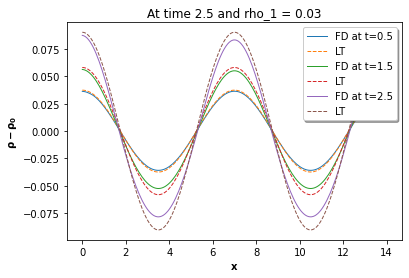

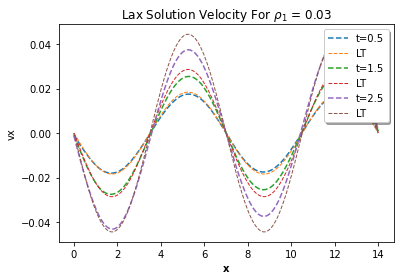

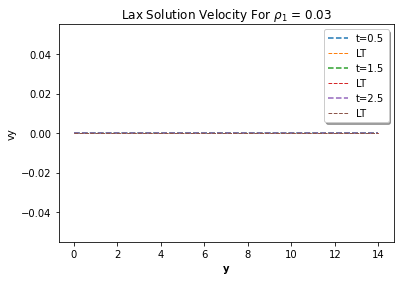

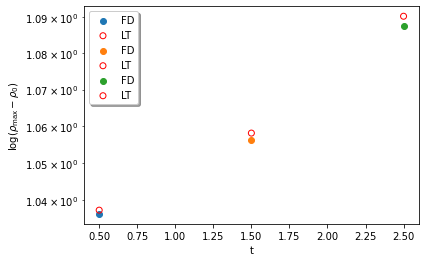

In [29]:
time_array = np.asarray([0.5,1.5,2.5])
for time in time_array:
    # lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = True,comparison = True,animation=None)
    lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=True,isplot = True,comparison = True,animation=None)